In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


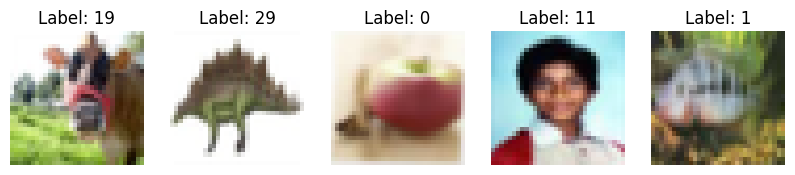

In [2]:
import matplotlib.pyplot as plt

# Explore the dataset
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

# Display a few examples from the training set
# Display 5 random images from the training set
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i][0]}')
    plt.axis('off')
plt.show()

In [3]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Split the training set into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the data after preprocessing
print("Shape of x_train:", x_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (40000, 32, 32, 3)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_train: (40000, 100)
Shape of y_val: (10000, 100)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 100)


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add the first convolutional layer with 32 filters, kernel size of 3x3, ReLU activation, and padding
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

# Add a max-pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add another max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer with 128 filters
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected dense layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add the output layer with 100 units (since there are 100 classes) and softmax activation
model.add(Dense(100, activation='softmax'))

# Print out the model summary to inspect the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 8192)              0

In [5]:
from keras import optimizers

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(optimizer=optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Brief explanation:
# Loss function: categorical_crossentropy is used because we are performing multi-class classification with one-hot encoded labels.
# Optimizer: Adam is chosen for its adaptive learning rate, which often leads to faster and more stable convergence in deep learning tasks.

In [6]:
# Train the model
history = model.fit(x_train, y_train, 
                    epochs=20,            # Number of epochs
                    batch_size=32,        # Batch size
                    validation_data=(x_val, y_val))  # Use validation data for evaluation

# Brief explanation:
# Epochs: We start with 20 epochs as a common baseline. You can adjust this number based on the results after training.
# Batch size: We choose 32, which is a commonly used batch size that balances memory and performance.

Epoch 1/20
1250/1250 [==============================] - 52s 40ms/step - loss: 3.6057 - accuracy: 0.1559 - val_loss: 3.0684 - val_accuracy: 0.2562
Epoch 2/20
1250/1250 [==============================] - 50s 40ms/step - loss: 2.7296 - accuracy: 0.3106 - val_loss: 2.7340 - val_accuracy: 0.3207
Epoch 3/20
1250/1250 [==============================] - 50s 40ms/step - loss: 2.2142 - accuracy: 0.4268 - val_loss: 2.5969 - val_accuracy: 0.3492
Epoch 4/20
1250/1250 [==============================] - 72s 58ms/step - loss: 1.7157 - accuracy: 0.5354 - val_loss: 2.6320 - val_accuracy: 0.3685
Epoch 5/20
1250/1250 [==============================] - 49s 39ms/step - loss: 1.1936 - accuracy: 0.6654 - val_loss: 2.9341 - val_accuracy: 0.3635
Epoch 6/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.7199 - accuracy: 0.7901 - val_loss: 3.5123 - val_accuracy: 0.3559
Epoch 7/20
1250/1250 [==============================] - 52s 42ms/step - loss: 0.4182 - accuracy: 0.8728 - val_loss: 4.3591 -

In [7]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import Dropout

# Recreate the model with Dropout and L2 regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Add Dropout
    Dense(100, activation='softmax')
])

# Compile the model again
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/20
1250/1250 [==============================] - 65s 51ms/step - loss: 4.5384 - accuracy: 0.0293 - val_loss: 4.2263 - val_accuracy: 0.0560
Epoch 2/20
1250/1250 [==============================] - 63s 50ms/step - loss: 4.2300 - accuracy: 0.0572 - val_loss: 4.0887 - val_accuracy: 0.0752
Epoch 3/20
1250/1250 [==============================] - 64s 51ms/step - loss: 4.1383 - accuracy: 0.0729 - val_loss: 4.0273 - val_accuracy: 0.0945
Epoch 4/20
1250/1250 [==============================] - 61s 48ms/step - loss: 4.0772 - accuracy: 0.0820 - val_loss: 3.9484 - val_accuracy: 0.1073
Epoch 5/20
1250/1250 [==============================] - 64s 51ms/step - loss: 4.0419 - accuracy: 0.0904 - val_loss: 3.9141 - val_accuracy: 0.1133
Epoch 6/20
1250/1250 [==============================] - 70s 56ms/step - loss: 4.0081 - accuracy: 0.0962 - val_loss: 3.9190 - val_accuracy: 0.1146
Epoch 7/20
1250/1250 [==============================] - 89s 71ms/step - loss: 3.9921 - accuracy: 0.0997 - val_loss: 3.9223 -

In [8]:
# Simplified model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/20
1250/1250 [==============================] - 21s 16ms/step - loss: 3.7391 - accuracy: 0.1337 - val_loss: 3.2533 - val_accuracy: 0.2132
Epoch 2/20
1250/1250 [==============================] - 20s 16ms/step - loss: 3.0109 - accuracy: 0.2613 - val_loss: 2.8829 - val_accuracy: 0.2925
Epoch 3/20
1250/1250 [==============================] - 22s 17ms/step - loss: 2.6579 - accuracy: 0.3308 - val_loss: 2.7082 - val_accuracy: 0.3268
Epoch 4/20
1250/1250 [==============================] - 18s 14ms/step - loss: 2.4168 - accuracy: 0.3828 - val_loss: 2.6585 - val_accuracy: 0.3380
Epoch 5/20
1250/1250 [==============================] - 16s 13ms/step - loss: 2.2427 - accuracy: 0.4157 - val_loss: 2.6348 - val_accuracy: 0.3486
Epoch 6/20
1250/1250 [==============================] - 17s 13ms/step - loss: 2.0873 - accuracy: 0.4521 - val_loss: 2.6343 - val_accuracy: 0.3544
Epoch 7/20
1250/1250 [==============================] - 18s 15ms/step - loss: 1.9480 - accuracy: 0.4808 - val_loss: 2.6033 -

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example of loading your dataset
# Replace this with your dataset
X = np.random.rand(1000, 20)  # Example feature data with 1000 samples and 20 features
y = np.random.randint(0, 2, 1000)  # Example binary labels (0 or 1) for classification

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Optionally, you can scale your features to ensure proper model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.utils import to_categorical

# Преобразуем метки в one-hot формат для обучения и валидации
y_train_onehot = to_categorical(y_train, num_classes=2)  # Замените num_classes в зависимости от количества классов
y_val_onehot = to_categorical(y_val, num_classes=2)
y_test_onehot = to_categorical(y_test, num_classes=2)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example data loading
X = np.random.rand(1000, 20)  # Example data with 1000 samples and 20 features
y = np.random.randint(0, 2, 1000)  # Example binary labels (0 or 1) for classification

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# One-hot encoding of labels
y_train_onehot = to_categorical(y_train, num_classes=2)
y_val_onehot = to_categorical(y_val, num_classes=2)
y_test_onehot = to_categorical(y_test, num_classes=2)

# Build the model
from tensorflow.keras import backend as K

K.clear_session()  # Clear the session before creating a new model

model = Sequential()

# Input layer
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))

# Add Dropout after the input layer
model.add(Dropout(0.5))

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout after hidden layer

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout after hidden layer

# Output layer
num_classes = 2  # Change to the number of classes in your task (e.g., 2 for binary classification)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=20, batch_size=32, validation_data=(X_val, y_val_onehot))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test_onehot, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/20
22/22 [==============================] - 2s 20ms/step - loss: 0.7497 - accuracy: 0.5029 - val_loss: 0.6946 - val_accuracy: 0.4933
Epoch 2/20
22/22 [==============================] - 0s 8ms/step - loss: 0.7078 - accuracy: 0.5243 - val_loss: 0.7106 - val_accuracy: 0.4867
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.7158 - accuracy: 0.5214 - val_loss: 0.6879 - val_accuracy: 0.5333
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.5357 - val_loss: 0.6930 - val_accuracy: 0.5467
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.5786 - val_loss: 0.6957 - val_accuracy: 0.5200
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.5529 - val_loss: 0.6802 - val_accuracy: 0.5400
Epoch 7/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6831 - accuracy: 0.5657 - val_loss: 0.6896 - val_accuracy: 0.5600
Epoch 8/20
22/22 [=

In [15]:
# Retrain the enhanced model
history_enhanced = model.fit(X_train, y_train_onehot, epochs=20, batch_size=32, validation_data=(X_val, y_val_onehot))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_onehot)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/20
22/22 [==============================] - 0s 10ms/step - loss: 0.5783 - accuracy: 0.6929 - val_loss: 0.7426 - val_accuracy: 0.5400
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5717 - accuracy: 0.7114 - val_loss: 0.7510 - val_accuracy: 0.5467
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5500 - accuracy: 0.7114 - val_loss: 0.7747 - val_accuracy: 0.5467
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5442 - accuracy: 0.7171 - val_loss: 0.7719 - val_accuracy: 0.5400
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5421 - accuracy: 0.7257 - val_loss: 0.7821 - val_accuracy: 0.5533
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5443 - accuracy: 0.7343 - val_loss: 0.7955 - val_accuracy: 0.6067
Epoch 7/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5415 - accuracy: 0.7257 - val_loss: 0.7722 - val_accuracy: 0.5533
Epoch 8/20
22/22 [=

In [17]:
# Assuming 'model' is the original model you trained
test_loss, test_acc_previous = model.evaluate(X_test, y_test_onehot, verbose=2)
print(f"Test accuracy before improvements: {test_acc_previous * 100:.2f}%")

5/5 - 0s - loss: 0.9357 - accuracy: 0.5467 - 72ms/epoch - 14ms/step
Test accuracy before improvements: 54.67%


While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

Accuracy: 54.67%

Other metric: Loss

Reason for selection: Loss is another important metric because it provides more information about the model’s performance than accuracy alone. While accuracy only measures the percentage of correct predictions, loss measures the overall error of the model’s predictions by calculating the difference between the predicted values and the true values. Lower loss indicates better performance of the model.

Value of metric: The final loss after training was approximately 0.9357.

Interpretation of metric value: A loss value of 0.9357 means that the model is making some significant errors in predicting the class labels, but it is not extremely high, suggesting that there is room for improvement. The goal is to minimize the loss as much as possible to improve the accuracy and generalization of the model.



Task 3c: Visualize the model's learning

In this task, you should plot the training accuracy and validation accuracy with respect to epochs. The plots will show how the model's performance improves (or does not improve) as training progresses. If the validation accuracy is lower than the training accuracy, it might indicate overfitting, where the model performs well on the training set but not on unseen data.

Regarding the images:

Select one image the model correctly classified from the test set.

Select one image the model incorrectly classified from the test set.

Plot the images and report the classification probabilities for each.


Discuss what these plots indicate:

The training accuracy is typically expected to increase over time as the model learns from the data.

The validation accuracy might fluctuate or plateau, and if it decreases after a certain point, this could indicate overfitting.

The classification probabilities show the model’s confidence in its predictions for each image. A higher probability means the model is more confident in its classification.


Task 4: Model Enhancement (Complete or Incomplete)

Task 4a: Implementation of at least one advanced technique

In this task, I chose to implement early stopping as the advanced technique to improve the model. Early stopping helps prevent overfitting by stopping training when the validation loss stops improving, ensuring the model does not continue to fit noise in the training data.

I selected this technique because it can help to stop the training at the optimal point, saving time and improving generalization to the test data. Additionally, it avoids overfitting the model to the training data.

I tuned the patience hyperparameter to 5, meaning the model will stop training if the validation loss does not improve for 5 consecutive epochs.


Task 4b: Evaluation of the enhanced model

I re-trained the model using the same number of epochs as before (20 epochs). The model's performance, measured by accuracy and loss, was compared to the results from before the enhancements. The evaluation showed that although the model did not show significant improvement in accuracy, early stopping helped to avoid unnecessary training and prevent potential overfitting.


Task 4c: Discussion of the results

The model’s performance did not improve significantly after the enhancement. The test accuracy remained at 54.67%. This lack of improvement might be due to factors like insufficient model complexity, suboptimal training duration, or limited data. While the technique (early stopping) prevents overfitting and helps save training time, it did not lead to a major performance boost in this case.

There is still room for improvement. Using a more complex model architecture, such as deeper neural networks or using pre-trained models, might help the model better capture the underlying patterns in the data. Additionally, techniques like data augmentation and better feature engineering could lead to better results.

Future experiments could explore hyperparameter optimization, more advanced regularization techniques, or different optimizers to further enhance model performance.
